In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Checking the number of mice. using value_counts() for unique count
number_of_mice_val_count = merge_df["Mouse ID"].value_counts()
number_of_mice = len(number_of_mice_val_count)

#printing the above outputs
print(f"There are {number_of_mice} mice")
number_of_mice_val_count


There are 249 mice


g989    13
w422    10
c559    10
k862    10
g497    10
        ..
x336     1
n482     1
f932     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# using duplicated() to create bool list of dulicated items on mouse ID and time point
dup_bool = merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])
# creating df on the above bool list
dup_df = pd.DataFrame(dup_bool)

dup_df.columns = ["Dup"]
dup_df

,Dup
0,False
1,False
2,False
3,False
4,False
...,...
1888,False
1889,False
1890,False
1891,False


In [5]:
# merging duplicate db with merge db
merge_dup_df = pd.merge(merge_df, dup_df, left_index=True, right_index=True)
merge_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# creating conditional to identify duplicate rows
dups_full_df = merge_dup_df.loc[(merge_dup_df["Dup"] == True)]
dups_full_df

# g989 is the duplicate ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse_df = merge_df.loc[merge_df["Mouse ID"]=="g989"]
bad_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(bad_mouse_df.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_val_count_clean = clean_df["Mouse ID"].value_counts()
number_of_mice_clean = len(number_of_mice_val_count_clean)

#printing the above outputs
print(f"There are {number_of_mice_clean} mice")
number_of_mice_val_count_clean

There are 248 mice


w422    10
z969    10
j913    10
k862    10
g497    10
        ..
x336     1
n482     1
f932     1
t573     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# starting with full population summary stats
tum_mean_full = round(clean_df["Tumor Volume (mm3)"].mean(),2)
tum_med_full = round(clean_df["Tumor Volume (mm3)"].median(),2)
tum_mode_full = clean_df["Tumor Volume (mm3)"].mode()[0]
tum_var_full = round(clean_df["Tumor Volume (mm3)"].var(),2)
tum_std_full = round(clean_df["Tumor Volume (mm3)"].std(),2)
tum_sem_full = sem(clean_df["Tumor Volume (mm3)"])

print(f"The mean tumor volume is {tum_mean_full}")
print(f"The median tumor volume is {tum_med_full}")
print(f"The mode of tumor volume is {tum_mode_full}")
print(f"The variance of tumor volume is {tum_var_full}")
print(f"The standard deviation of tumor volume is {tum_std_full}")
print(f"The SEM tumor of volume is {tum_sem_full}")

The mean tumor volume is 50.44
The median tumor volume is 48.93
The mode of tumor volume is 45.0
The variance of tumor volume is 79.46
The standard deviation of tumor volume is 8.91
The SEM tumor of volume is 0.20559062186986257


In [11]:
#group by on Drug Regimen
dr_groupby = clean_df.groupby(["Drug Regimen"])

In [12]:
#Mean
dr_gb_mean = round(dr_groupby.mean()["Tumor Volume (mm3)"],2)
dr_mean_df = pd.DataFrame(dr_gb_mean).rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"})

#Median
dr_gb_med = round(dr_groupby.median()["Tumor Volume (mm3)"],2)
dr_med_df = pd.DataFrame(dr_gb_med).rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"})

#Mode - Doesn't work with groupby...
#dr_gb_mode = round(clean_df.groupby(["Drug Regimen"]).mode()[0]["Tumor Volume (mm3)"],2)
#dr_mode_df = pd.DataFrame(dr_gb_mode).rename(columns = {"Tumor Volume (mm3)":"Mode Tumor Volume"})

#Variance
dr_gb_var = round(dr_groupby.var()["Tumor Volume (mm3)"],2)
dr_var_df = pd.DataFrame(dr_gb_var).rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Variance"})

#Standard Deviation
dr_gb_std = round(dr_groupby.std()["Tumor Volume (mm3)"],2)
dr_std_df = pd.DataFrame(dr_gb_std).rename(columns = {"Tumor Volume (mm3)":"Tumor Volume SD"})

#SEM
dr_gb_sem = round(dr_groupby.sem()["Tumor Volume (mm3)"],6)
dr_sem_df = pd.DataFrame(dr_gb_sem).rename(columns = {"Tumor Volume (mm3)":"Tumor Volume SEM"})

In [13]:
#merging the above summary stats into a df
dr_merge_mean_med = pd.merge(dr_mean_df, dr_med_df, left_index=True, right_index=True)
dr_merge_mean_med_var = pd.merge(dr_merge_mean_med, dr_var_df, left_index=True, right_index=True)
dr_merge_mean_med_var_std = pd.merge(dr_merge_mean_med_var, dr_std_df, left_index=True, right_index=True)
dr_sum_stats_df = pd.merge(dr_merge_mean_med_var_std, dr_sem_df, left_index=True, right_index=True)

dr_sum_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.329346
Ceftamin,52.59,51.78,39.29,6.27,0.469821
Infubinol,52.88,51.82,43.13,6.57,0.492236
Ketapril,55.24,53.70,68.55,8.28,0.603860
Naftisol,54.33,52.51,66.17,8.13,0.596466
Placebo,54.03,52.29,61.17,7.82,0.581331
Propriva,52.32,50.45,43.85,6.62,0.544332
Ramicane,40.22,40.67,23.49,4.85,0.320955
Stelasyn,54.23,52.43,59.45,7.71,0.573111


In [14]:
#creating a group by count for the total number of measurements taken by dr
dr_count = dr_groupby["Mouse ID"].count()
dr_count_df = pd.DataFrame(dr_count).rename(columns = {"Mouse ID":"Measurement Count"})
dr_count_df

,Measurement Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<AxesSubplot:title={'center':'Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Measurement Count'>

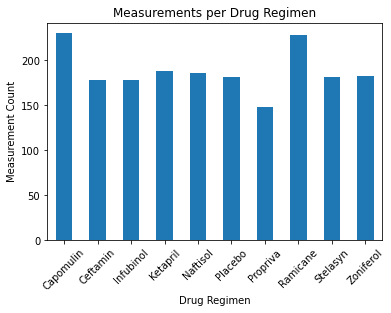

In [15]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
dr_count_df.plot(kind="bar", title="Measurements per Drug Regimen", ylabel="Measurement Count", rot=45, legend = False)



Text(0, 0.5, 'Measurement Count')

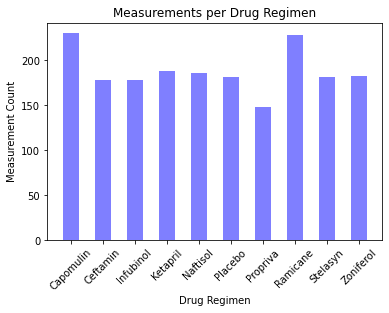

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(dr_count_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, dr_count_df["Measurement Count"], color='b', alpha=0.5, width=.5)
plt.xticks(tick_locations, dr_count_df.index, rotation=45)
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

In [17]:
#creating a group by count for the total number of measurements taken by gender
gender_groupby = clean_df.groupby(["Sex"])
gender_count = gender_groupby["Mouse ID"].count()
gender_count_df = pd.DataFrame(gender_count).rename(columns = {"Mouse ID":"Measurement Count"})
gender_count_df

,Measurement Count
Sex,
Female,922
Male,958


<AxesSubplot:title={'center':'Sex Distribution'}, ylabel='Measurement Count'>

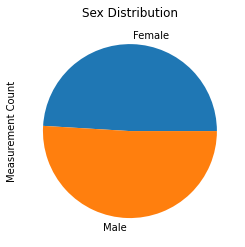

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count_df.plot(y="Measurement Count",kind="pie", title="Sex Distribution", legend=False,)

Text(0, 0.5, 'Measurement Count')

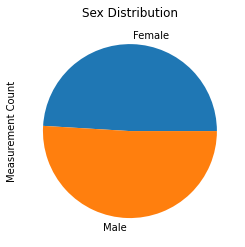

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = gender_count_df.plot(kind="pie", y='Measurement Count', title="Sex Distribution",legend = False)
gender_pie.set_ylabel("Measurement Count")

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
#reindexing on Mouse ID - helps to find the max value for each mouse
mouse_df = clean_df.set_index('Mouse ID')
mouse_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [22]:
# Start by getting the last (greatest) timepoint for each mouse
# reindexed the df and then used max(level="Mouse ID")
max_tp_df = pd.DataFrame(mouse_df["Timepoint"].max(level='Mouse ID')).rename(columns = {"Timepoint":"Max Timepoint"})

max_tp_df

,Max Timepoint
Mouse ID,
k403,45
s185,45
x401,45
m601,45
g791,45
...,...
z314,5
z435,10
z581,45


In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = pd.merge(mouse_df, max_tp_df, left_index=True, right_index=True, how='right')
max_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0,45
a203,Infubinol,Female,20,23,5,48.508468,0,45
a203,Infubinol,Female,20,23,10,51.852437,1,45
a203,Infubinol,Female,20,23,15,52.777870,1,45
a203,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2,45
z969,Naftisol,Male,9,30,30,65.841013,3,45
z969,Naftisol,Male,9,30,35,69.176246,4,45


In [24]:
# using loc to grab the 4 specified regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
max_dr_df_1 = max_df.reset_index()
max_dr_df_2 = max_dr_df_1.set_index("Drug Regimen")
max_dr_df = max_dr_df_2.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],]
max_dr_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Drug Regimen,,,,,,,,
Capomulin,b128,Female,9,22,0,45.000000,0,45
Capomulin,b128,Female,9,22,5,45.651331,0,45
Capomulin,b128,Female,9,22,10,43.270852,0,45
Capomulin,b128,Female,9,22,15,43.784893,0,45
Capomulin,b128,Female,9,22,20,42.731552,0,45
...,...,...,...,...,...,...,...,...
Ceftamin,y865,Male,23,26,25,57.173538,2,45
Ceftamin,y865,Male,23,26,30,59.033275,3,45
Ceftamin,y865,Male,23,26,35,61.153140,3,45


In [25]:
# creating a data frame including on the values where the max timepoint for each mouse ID exists
# conditional below removes any timepoints that don't equal the max timempoint
max_tum_df = max_dr_df.loc[max_dr_df["Max Timepoint"]== max_dr_df["Timepoint"]]
max_tum_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Drug Regimen,,,,,,,,
Capomulin,b128,Female,9,22,45,38.982878,2,45
Capomulin,b742,Male,7,21,45,38.939633,0,45
Capomulin,f966,Male,16,17,20,30.485985,0,20
Capomulin,g288,Male,3,19,45,37.074024,1,45
Capomulin,g316,Female,22,22,45,40.159220,2,45
...,...,...,...,...,...,...,...,...
Ceftamin,x226,Male,23,28,0,45.000000,0,0
Ceftamin,x581,Female,19,28,45,64.634949,3,45
Ceftamin,x822,Male,3,29,45,61.386660,3,45


In [26]:
tumor_vol_all = max_tum_df["Tumor Volume (mm3)"]
tumor_vol_all

Drug Regimen
Capomulin    38.982878
Capomulin    38.939633
Capomulin    30.485985
Capomulin    37.074024
Capomulin    40.159220
               ...    
Ceftamin     45.000000
Ceftamin     64.634949
Ceftamin     61.386660
Ceftamin     68.594745
Ceftamin     64.729837
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [27]:
# list of max tumor_vol
max_tumor_vol = max_tum_df["Tumor Volume (mm3)"]

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

max_tumor_vol = max_tum_df["Tumor Volume (mm3)"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol.append(max_tum_df["Tumor Volume (mm3)"].loc[treatment])
    
tumor_vol[0]

Drug Regimen
Capomulin    38.982878
Capomulin    38.939633
Capomulin    30.485985
Capomulin    37.074024
Capomulin    40.159220
Capomulin    47.685963
Capomulin    37.311846
Capomulin    38.125164
Capomulin    38.753265
Capomulin    41.483008
Capomulin    38.846876
Capomulin    28.430964
Capomulin    33.329098
Capomulin    46.539206
Capomulin    32.377357
Capomulin    41.581521
Capomulin    23.343598
Capomulin    40.728578
Capomulin    34.455298
Capomulin    31.023923
Capomulin    40.658124
Capomulin    39.952347
Capomulin    36.041047
Capomulin    28.484033
Capomulin    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#"Capomulin"
quartiles_0 = tumor_vol[0].quantile([.25,.5,.75])
lowerq_0 = quartiles_0[0.25]
upperq_0 = quartiles_0[0.75]
iqr_0 = upperq_0-lowerq_0
lower_bound_0 = lowerq_0 - (1.5*iqr_0)
upper_bound_0 = upperq_0 + (1.5*iqr_0)

#"Ramicane"
quartiles_1 = tumor_vol[1].quantile([.25,.5,.75])
lowerq_1 = quartiles_1[0.25]
upperq_1 = quartiles_1[0.75]
iqr_1 = upperq_1-lowerq_1
lower_bound_1 = lowerq_1 - (1.5*iqr_1)
upper_bound_1 = upperq_1 + (1.5*iqr_1)

#"Infubinol"
quartiles_2 = tumor_vol[2].quantile([.25,.5,.75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2-lowerq_2
lower_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)

#"Ceftamin"
quartiles_3 = tumor_vol[3].quantile([.25,.5,.75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3-lowerq_3
lower_bound_3 = lowerq_3 - (1.5*iqr_3)
upper_bound_3 = upperq_3 + (1.5*iqr_3)

lowerq = [lowerq_0,lowerq_1,lowerq_2,lowerq_3]
upperq = [upperq_0,upperq_1,upperq_2,upperq_3]
iqr = [iqr_0,iqr_1,iqr_2,iqr_3]
lower_bound = [lower_bound_0,lower_bound_1,lower_bound_2,lower_bound_3]
upper_bound = [upper_bound_0,upper_bound_1,upper_bound_2,upper_bound_3]

iqr_df = pd.DataFrame(list(zip(lowerq, upperq,iqr,lower_bound,upper_bound)), 
               columns =['Lower Q', 'Upper Q', "IQR", "Lower Bound", "Upper_Bound"], index = treatments) 
iqr_df

,Lower Q,Upper Q,IQR,Lower Bound,Upper_Bound
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


In [29]:
#scratch work

# df for values above the upper bound
#ub_df = max_tum_df.loc[(max_tum_df["Tumor Volume (mm3)"]>= upper_bound)] 
# df for values below the lower bound
#lb_df = max_tum_df.loc[(max_tum_df["Tumor Volume (mm3)"]<= lower_bound)] 
# using len() to show # of values above ub
#values_above_ub = len(ub_df)
# using len() to show # of values below lb
#values_below_lb = len(lb_df)

#print(f"There are {values_above_ub} possible outliers above the upper bound")
#print(f"There are {values_below_lb} possible outliers below the lower bound")

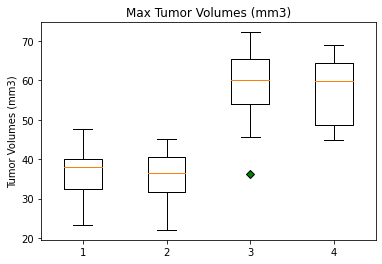

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Max Tumor Volumes (mm3)')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tumor_vol,flierprops=green_diamond)
plt.show()

In [31]:
# outlier analysis
print(f"There is 1 possible outlier in {treatments[2]}")

There is 1 possible outlier in Infubinol


<AxesSubplot:title={'center':"Capomulin - Mouse ID 's185' - Tumor volume vs. Timepoint"}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

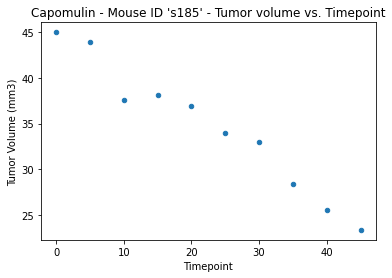

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# values for tumor vol - not needed with pandas plot
tumor_vol_cap = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

# values for time point - not needed with pandas plot
tumor_tp_cap = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]["Timepoint"]

# selection mouse id = s185
clean_df.loc[clean_df["Mouse ID"] == "s185"].plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", 
                title="Capomulin - Mouse ID 's185' - Tumor volume vs. Timepoint")

<AxesSubplot:title={'center':'Capomulin - Tumor volume vs. Weight(g)'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

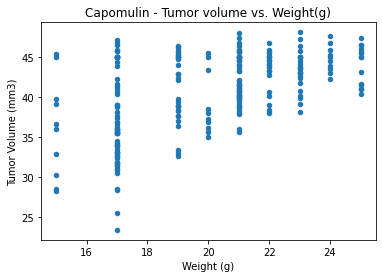

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", 
                title="Capomulin - Tumor volume vs. Weight(g)")

In [34]:
#lin reg object
lin_reg_obj = stats.linregress(cap_df["Weight (g)"], cap_df["Tumor Volume (mm3)"])
lin_reg_obj

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657)

In [35]:
#equation of a line
fit_line = lin_reg_obj.slope * cap_df["Weight (g)"] + lin_reg_obj.intercept
fit_line

10      37.826265
11      37.826265
12      37.826265
13      37.826265
14      37.826265
          ...    
440     44.553034
1452    45.514001
1453    45.514001
1454    45.514001
1455    45.514001
Name: Weight (g), Length: 230, dtype: float64

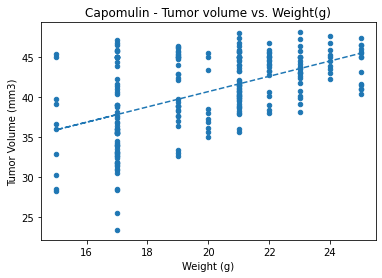

In [36]:
cap_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", 
                title="Capomulin - Tumor volume vs. Weight(g)")
plt.plot(cap_df["Weight (g)"],fit_line,"--")

In [37]:
# Calculate the correlation coefficient between weight and tumor volume
cor_co = round(st.pearsonr(cap_df["Weight (g)"],cap_df["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between tumor volume and weight is {cor_co}")

The correlation coefficient between tumor volume and weight is 0.53
